In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt 
import matplotlib.ticker as mtick 

In [2]:
art = pd.read_csv("/Users/me./Desktop/Spring '22 /Machine Learning/Project/h-and-m-personalized-fashion-recommendations/articles.csv")
cust = pd.read_csv("/Users/me./Desktop/Spring '22 /Machine Learning/Project/h-and-m-personalized-fashion-recommendations/customers.csv")
trans = pd.read_csv("/Users/me./Desktop/Spring '22 /Machine Learning/Project/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [3]:
art.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
cust.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [5]:
trans.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


# Articles file


In [3]:
'''
Look for missing values in articles data 
'''
art.isna().sum()/len(art)*100 

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [39]:
print(len(art))
print(art.columns)


105542
Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [37]:
'''
Taken from kaggle
'''

'''
function to plot sorted horizontal bar charts
'''

def plot_bar(database, col, figsize = (13,5), pct = False, label = 'articles'): 
    
    fig, ax = plt.subplots(figsize = figsize, facecolor = '#f6f6f6')

    for loc in ['bottom', 'left']: 
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2) 
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if pct: 
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data = data, x = col, y = 'index' , color = '#2693d7', lw = 1.5, ec = 'black', zorder = 2)
        ax.set_xlabel('% of ' +label, fontsize = 10, weight = 'bold') 
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else: 
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data = data, x =col, y = 'index', color ='#2693d7', lw = 1.5, ec = 'black', zorder = 2) 
        ax.set_xlabel('# of articles'+ label) 
    
    ax.grid(zorder = 0)
    ax.text(0, -0.75, col, color ='black', fontsize = 10, ha = 'left', va = 'bottom', weight = 'bold', style = 'italic')
    ax.set_ylabel('')

    plt.show()




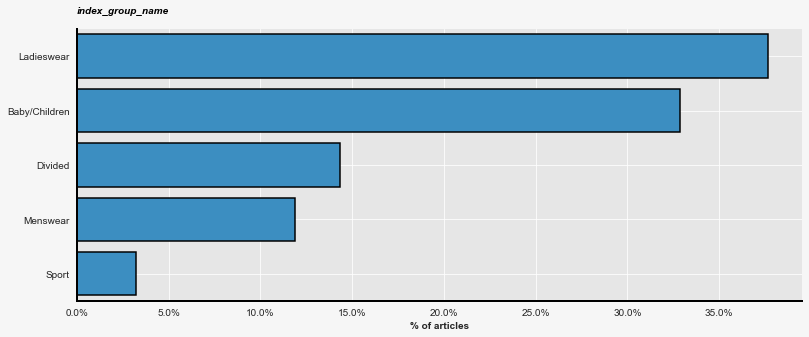

In [20]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
plot_bar(art, 'index_group_name', pct = True)

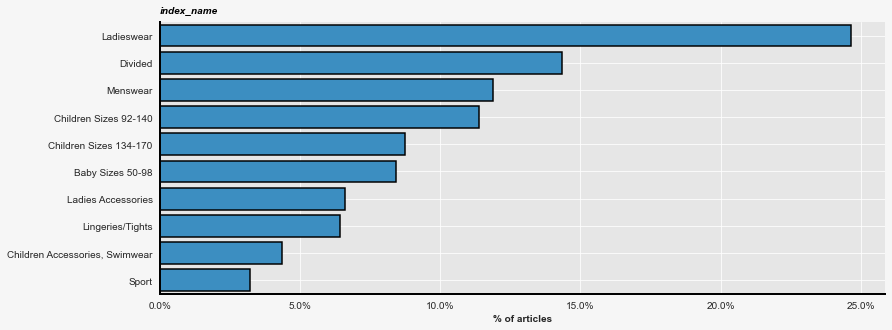

In [10]:
plot_bar(art, 'index_name', pct = True)

In [12]:
'''
group by index group and index name 
'''
art.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

In [16]:
'''
Pareto table and value
'''
data = art['product_group_name'].value_counts()
data = data.div(data.sum()).mul(100)
pareto = data.cumsum().rename('culumative_pct')
print(pareto)
data = pareto.reset_index()
data.columns = ['group', 'cumulative_pct']
data.index += 1 
data['cumulative_pct'][6]/100

Garment Upper body        40.496674
Garment Lower body        59.268348
Garment Full body         71.862387
Accessories               82.434481
Underwear                 87.636202
Shoes                     92.641792
Swimwear                  95.604593
Socks & Tights            97.918364
Nightwear                 99.717648
Unknown                   99.832294
Underwear/nightwear       99.883459
Cosmetic                  99.929886
Bags                      99.953573
Items                     99.969680
Furniture                 99.981998
Garment and Shoe care     99.990525
Stationery                99.995263
Interior textile          99.998105
Fun                      100.000000
Name: culumative_pct, dtype: float64


0.9264179189327472

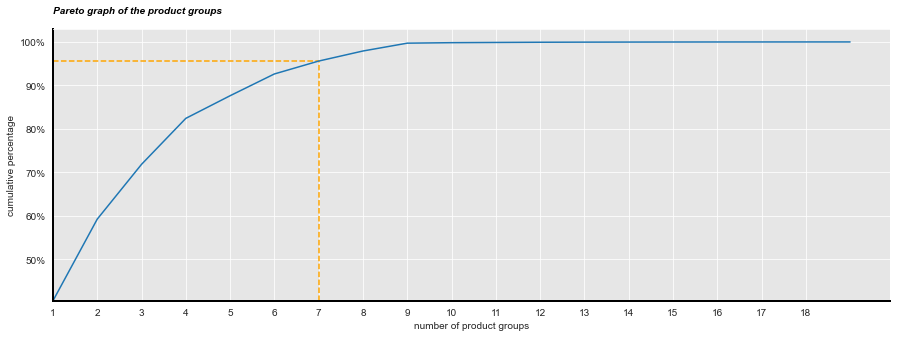

In [17]:
'''
Pareto Graph from kaggle
'''
fig, ax = plt.subplots(figsize=(15,5))

data = pareto.reset_index()
data.columns = ['features', 'cumulative_pct']
data.index += 1

sns.lineplot(data=data, x=data.index, y='cumulative_pct')

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
    
ax.set_xticks(pareto.reset_index().index)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('cumulative percentage')
ax.set_xlabel('number of product groups')
ax.set_xlim(1)
ax.set_ylim(data['cumulative_pct'][1])

ax.vlines(7, data['cumulative_pct'][1], data['cumulative_pct'][7], color='orange', ls='--')
ax.hlines(data['cumulative_pct'][7], 1, 7, color='orange', ls='--')
ax.text(0, 1.05, 'Pareto graph of the product groups', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic', transform=ax.transAxes)
plt.show()

# Word cloud


In [19]:
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud, STOPWORDS 
# from PIL import Image

# # creating cloud of words
# words_raw = art['detail_desc'].dropna().apply(nltk.word_tokenize)
# bag_of_words = " ".join(words_raw.explode())
# stopwords = set(STOPWORDS)

# # creating cloud of words
# fig, ax1 = plt.subplots(figsize=(8,6))
# wordcloud = WordCloud(stopwords=stopwords, background_color="white", height=300, contour_width=3).generate(bag_of_words)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Customers File

In [40]:
cust.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [22]:
'''
check for missing values 
'''
cust.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [23]:
cus_backup = cust.copy()
cust[['FN', 'Active']] = cust[['FN', 'Active']].fillna(0)

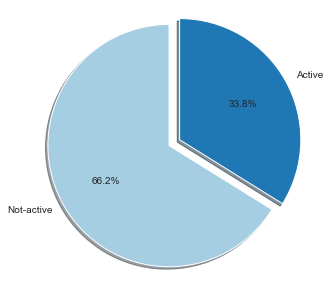

In [24]:
'''
Pie-chart active VS non active customers
'''
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(cust['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

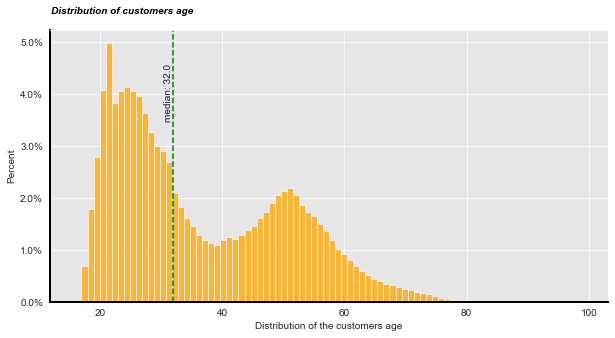

In [25]:
'''
Dist of customer age
'''
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = cust['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show()


In [26]:
'''
oldest customer and youngest customer 
'''
print('The oldest customer is {} years old.'.format(cust['age'].max()))
print('The youngest customer is {} years old.'.format(cust['age'].min()))

The oldest customer is 99.0 years old.
The youngest customer is 16.0 years old.


In [28]:
'''
Active age ratio bar plot
'''
active_age_ratio = cust.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==1]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['age'] = active_age_ratio['age'].astype(int)

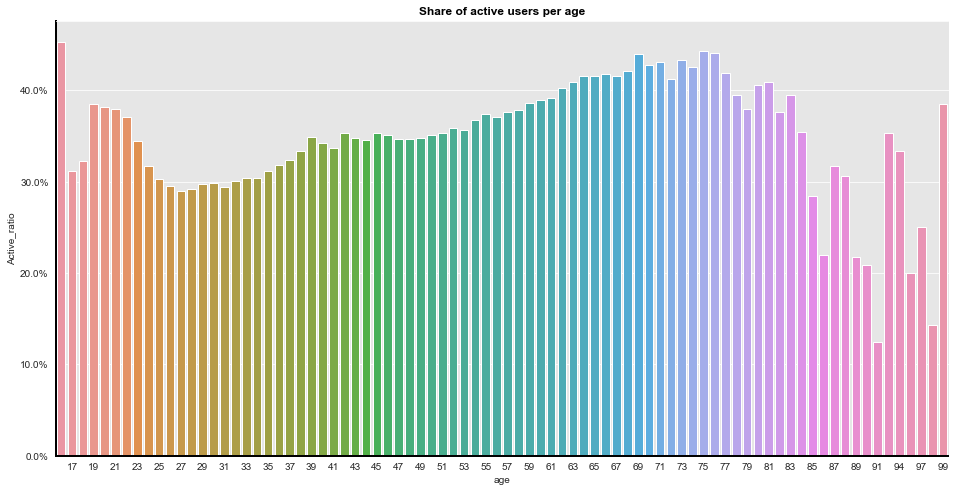

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='age', y='Active_ratio', data=active_age_ratio)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
ax.set_title("Share of active users per age", color='black', fontsize=12, weight='bold')
plt.show()

# Transaction file

In [41]:
print(len(trans))

31788324


In [30]:
'''
find null values
'''
trans.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [42]:
'''
change date datatype 
'''
trans['t_dat'] = pd.to_datetime(trans['t_dat'])

begin = trans['t_dat'].min()
end = trans['t_dat'].max()
print('Date range is from {} to {}.'.format(begin.date(), end.date()))


Date range is from 2018-09-20 to 2020-09-22.


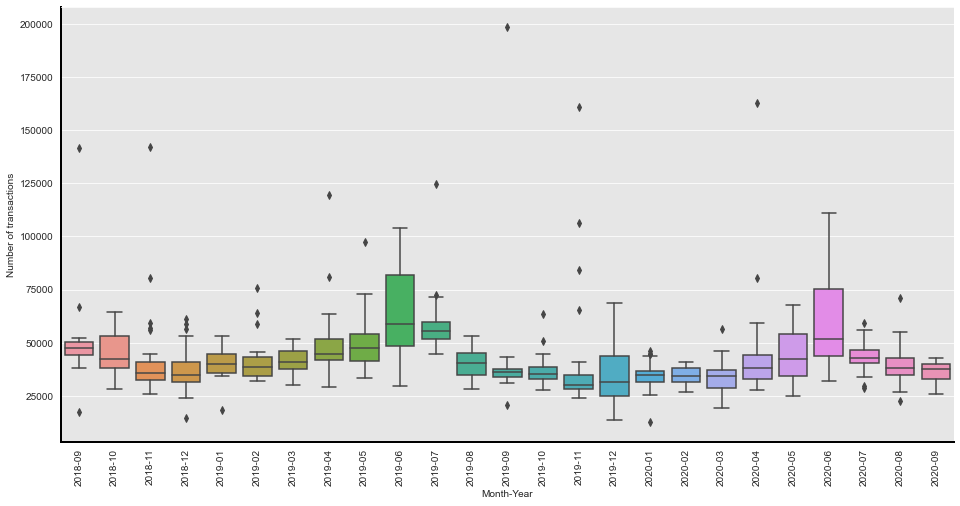

In [43]:
'''
Box Plot full time period 
'''
trans_gr_month = trans.groupby('t_dat').size().rename("no_transactions")
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show()

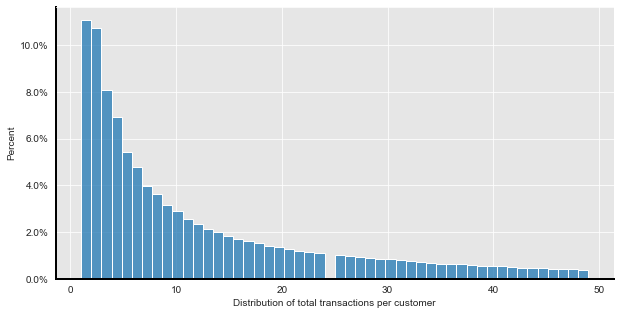

In [36]:
t_by_customer = trans.groupby('customer_id', as_index=False).size()
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()